# Insolation Figure

*This code was originally written by Anni Zhao (Peking) for her PhD thesis when she was at UCL with Chris. It has since been modified to look at the lig127k only and to focus on the high latitudes*

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec

import matplotlib.colors as colors
from matplotlib.lines import Line2D

from matplotlib.colors import LinearSegmentedColormap

import matplotlib.gridspec as gridspec


In [3]:
piline=[11,41,72,102,133,164,194,225,255,286,317,345]
mhline=[12,43,74,103,133,162,191,221,251,283,315,345]
ligline=[12,41,70,97,125,154,183,215,247,281,315,345]

In [4]:
monlocation=[15,45,74,105,135,166,196,227,258,288,319,349]
monname=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


In [5]:
monlocation=[0,26,56,87,117,148,179,209,240,270,301,331,360]
monname=["Mar",'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar']
monlocation1=[0]


In [6]:
fi = xr.open_dataset('insolation180.nc',decode_times=False)
day=fi['day']
lat=fi['lat']
pi1=fi['piControl']
lig1=fi['lig127k']
mh1=fi['midHolocene']
lig=fi['lig127k']*0
mh=fi['midHolocene']*0
pi=fi['piControl']*0

In [7]:
LIG=np.zeros((180,365))
LIG[:,0:6]=lig1[:,365-6:365]
LIG[:,6:365]=lig1[:,0:365-6]
lig.values=LIG


In [8]:
LIG=np.zeros((180,365))
LIG[:,0:276]=lig1[:,89:365]
LIG[:,276:365]=lig1[:,0:89]
lig.values=LIG
MH=np.zeros((180,365))
MH[:,0:276]=mh1[:,89:365]
MH[:,276:365]=mh1[:,0:89]
mh.values=MH
PI=np.zeros((180,365))
PI[:,0:276]=pi1[:,89:365]
PI[:,276:365]=pi1[:,0:89]
pi.values=PI

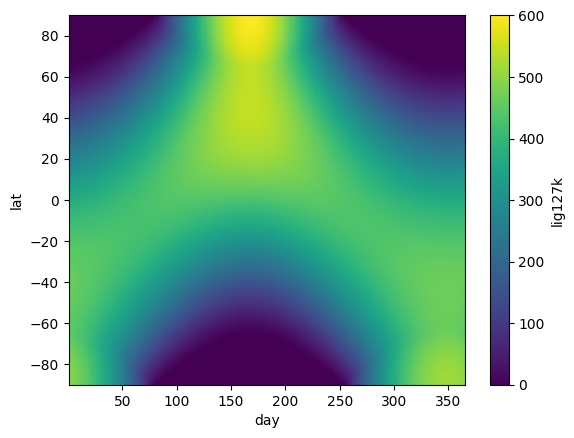

In [9]:
lig1.plot()

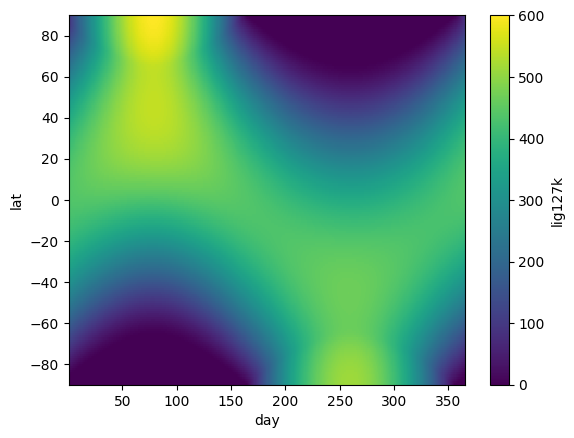

In [10]:
lig.plot()

In [11]:
check_lats=np.average(lig.lat[14:16])
check_lats

-75.0

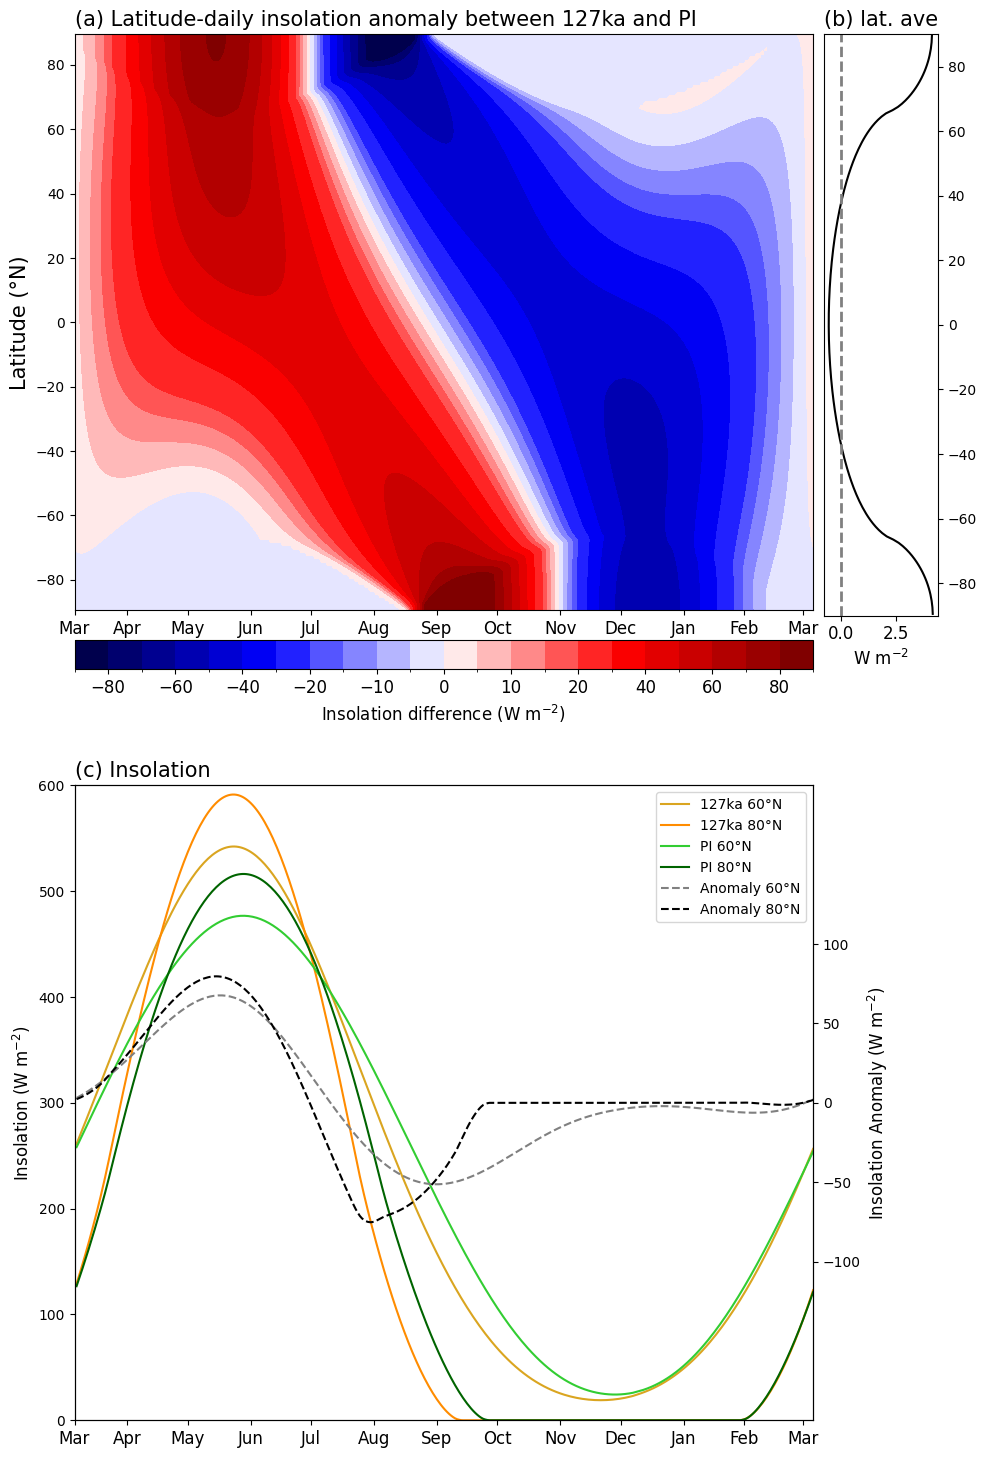

In [12]:
# lig
#define colours
c80 = '#B15928'
c70 = '#E69F00'
c60 = '#FFD700'

fig=plt.figure(figsize=(20,18))

cmap=plt.get_cmap('seismic')
bounds =[-200,-80,-70,-60,-50,-40,-30,-20,-15,-10,-5,0,5,10,15,20,30,40,50,60,70,80,200]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

ax1=plt.subplot2grid((26, 25), (0, 0),rowspan=12, colspan=12)
fig1=ax1.contourf(day,lat,lig-pi,levels=bounds,cmap=cmap,norm=norm)
ax1.set_xticks(monlocation)
ax1.set_xticklabels(monname, fontsize=12)
ax1.set_title('(a) Latitude-daily insolation anomaly between 127ka and PI',loc='left',fontsize=15)
#Put vertical lines to show the months for Pi and LIG. Removed for now
#for i in range(12):
#    ax1.axvline(x=piline[i],color='k',linestyle="dashed",linewidth=1.5)
#    ax1.axvline(x=ligline[i],color='k',linestyle='dotted',linewidth=1.5)
ax1.set_ylabel('Latitude (%sN)'%chr(176),fontsize=15 )
divider = make_axes_locatable(ax1)
cax = divider.new_vertical(size="5%", pad=0.3, pack_start=True)
fig.add_axes(cax)
cb=fig.colorbar(fig1, cax=cax, orientation="horizontal")
cb.ax.tick_params(labelsize=12)
cblabel='Insolation difference (W m$^{-2}$)'
cb.set_label(cblabel,fontsize=12)

# Set colorbar ticks to include 0 and every two ticks from there
ticks = [-80, -60, -40, -20, -10, 0, 10, 20, 40, 60, 80]
cb.set_ticks(ticks)

ax2=plt.subplot2grid((26, 25), (0, 12), rowspan=11,colspan=2)
fig2=ax2.plot(np.average(lig-pi,axis=1),lat,'black')
ax2.axvline(x=0,color='gray',linestyle="--",linewidth=2)
ax2.set_xlabel('W m$^{-2}$', fontsize=12)
ax2.set_title('(b) lat. ave',fontsize=15)
ax2.tick_params(axis='x', labelsize=12)
ax2.set_ylim([-90,90])
#ax2.axhline(y=60,color=c60,ls='dashed')
#ax2.axhline(y=70,color=c70,ls='dashed')
#ax2.axhline(y=80,color=c80,ls='dashed')
ax2.yaxis.tick_right()

#ax2.set_ylabel('latitude (%sN)'%chr(176),fontsize=12 )

ax3=plt.subplot2grid((26, 25), (14, 0), rowspan=12,colspan=12)

ax3.plot(day,np.average(lig[149:151],axis=0),color='goldenrod',ls='solid',label='127ka 60%sN'%(chr(176)))
#ax3.plot(day,np.average(lig[159:161],axis=0),color=c70,ls='solid',label='70%sN'%(chr(176)))
ax3.plot(day,np.average(lig[169:171],axis=0),color='darkorange',ls='solid',label='127ka 80%sN'%(chr(176)))

ax3.plot(day,np.average(pi[149:151],axis=0),color='limegreen',ls='solid',label='PI 60%sN'%(chr(176)))
#ax3.plot(day,np.average(lig[159:161],axis=0),color=c70,ls='solid',label='70%sN'%(chr(176)))
ax3.plot(day,np.average(pi[169:171],axis=0),color='darkgreen',ls='solid',label='PI 80%sN'%(chr(176)))

ax3.set_xticks(monlocation)
ax3.set_xlim([0,365])
ax3.set_xticklabels(monname, fontsize=12)
ax3.set_title('(c) Insolation',loc='left',fontsize=15)
ax3.set_ylim([0,600])
ax3.set_ylabel('Insolation (W m$^{-2}$)', fontsize=12 )


ax3_right = ax3.twinx()


diff=np.array(lig-pi)

#ax3_right.axhline(y=0,color='gray',linestyle="-",linewidth=1)
ax3_right.plot(day,np.average(diff[149:151],axis=0),'gray',ls='dashed',label='Anomaly 60%sN'%(chr(176)))
#ax3_right.plot(day,np.average(diff[159:161],axis=0),c70,ls='dashed',label='70%sN'%(chr(176)))
ax3_right.plot(day,np.average(diff[169:171],axis=0),'black',ls='dashed',label='Anomaly 80%sN'%(chr(176)))
ax3_right.set_ylabel('Insolation Anomaly (W m$^{-2}$)', fontsize=12 )
ax3_right.set_ylim([-200,200])
#onlyshow ticks up to +/-100 on the y axis
ax3_right.set_yticks(np.arange(-100,101,50))

"""
# Custom legend for line styles
solid_line = Line2D([0], [0], color='black', lw=2, linestyle='-')
dashed_line = Line2D([0], [0], color='black', lw=2, linestyle='--')

# Combine existing legend handles with custom handles
handles, labels = ax3.get_legend_handles_labels()
handles += [solid_line, dashed_line]
labels += ['127ka', 'Anomaly']
"""

#combine ax3 and ax3_right legends
handles, labels = ax3.get_legend_handles_labels()
handles_right, labels_right = ax3_right.get_legend_handles_labels()
handles += handles_right
labels += labels_right

# Add combined legend to the plot
ax3.legend(handles, labels, loc='upper right')



#plt.savefig('lig_insolation.png')
#plt.savefig('lig_insolation.pdf')  


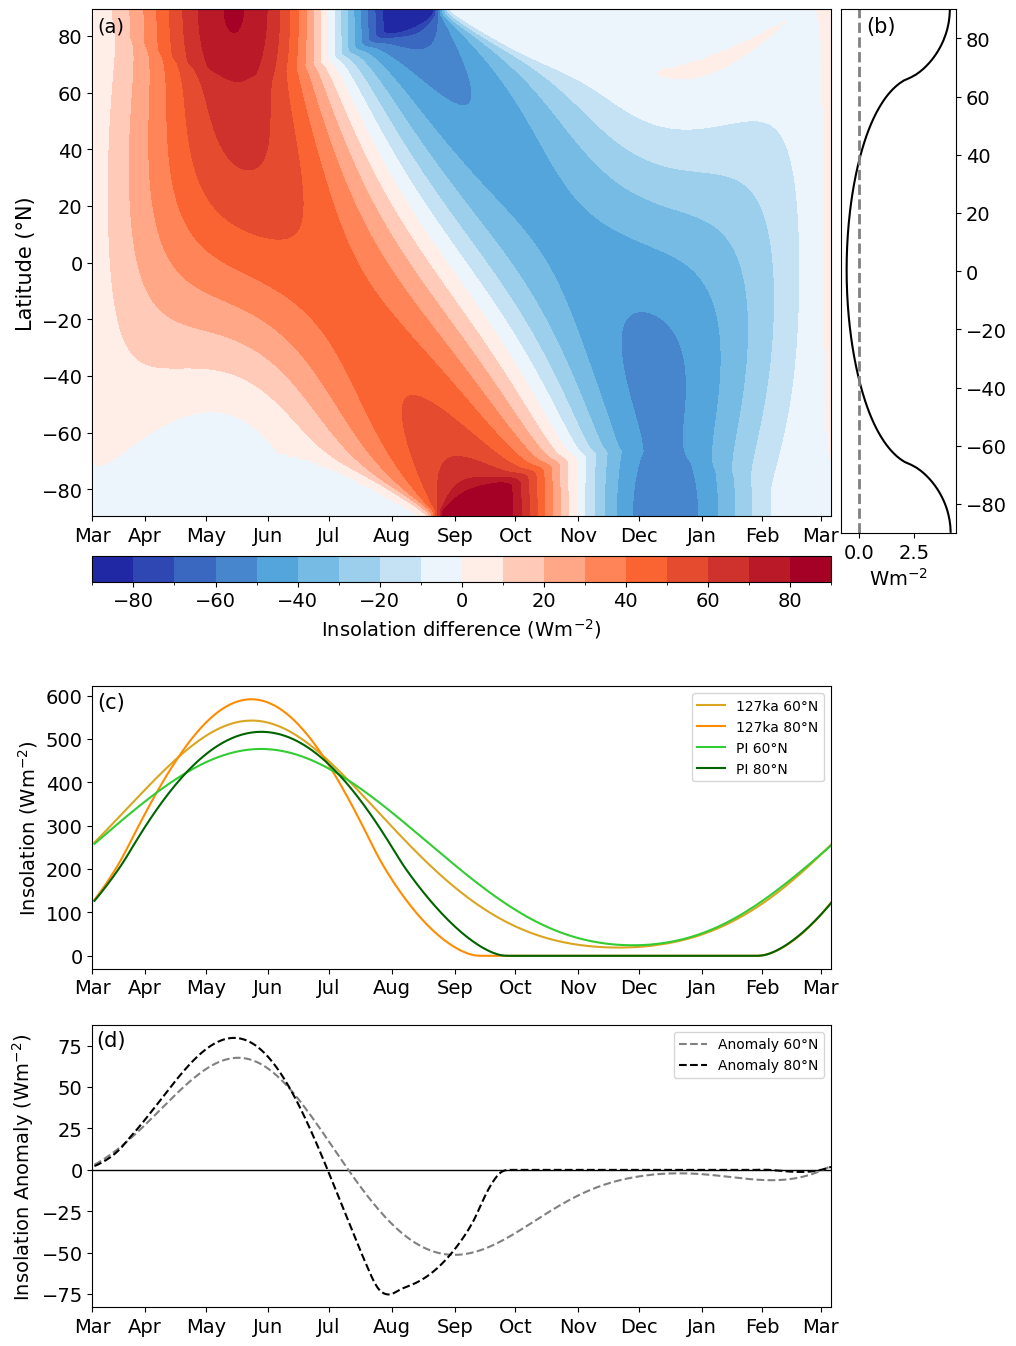

In [19]:
fig=plt.figure(figsize=(20,20))

#cmap=plt.get_cmap('RdYlBu_r') #'seismic'

#cmap=LinearSegmentedColormap.from_list('', ['indigo','darkblue','blue','lightblue','white', 'pink', 'red', 'orange','yellow'])
#cmap=LinearSegmentedColormap.from_list('', ['darkblue','blue','lightblue','white', 'orange', 'red', 'darkred'])

# color_list = [
#     '#313695',  # deep blue
#     '#67a9cf',  # light cyan
#     '#FFFFFF',  # white
#     '#f88c51',  # orange
#     '#a50026',  # deep red
# ]
fontsize = 15
color_list = [
    '#2128A4',  # deeper, more saturated blue
    '#57ADDE',  # more saturated cyan
    '#FFFFFF',  # white
    '#FF6A33',  # slightly more red-orange
    '#A50025',  # richer red
]
cmap = LinearSegmentedColormap.from_list('BlueYellowRed', color_list, N=256)

#bounds =[-200,-80,-70,-60,-50,-40,-30,-20,-15,-10,-5,0,5,10,15,20,30,40,50,60,70,80,200]
bounds =[-200,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,200]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

ax1=plt.subplot2grid((32, 25), (0, 0),rowspan=12, colspan=12)
fig1=ax1.contourf(day,lat,lig-pi,levels=bounds,cmap=cmap,norm=norm)
ax1.set_xticks(monlocation)
ax1.set_xticklabels(monname, fontsize=fontsize-1)
ax1.tick_params(axis='y', labelsize=fontsize-1)
ax1.set_title('(a)',fontsize=fontsize-1, y=0.94, x=0.025)
#Put vertical lines to show the months for Pi and LIG. Removed for now
#for i in range(12):
#    ax1.axvline(x=piline[i],color='k',linestyle="dashed",linewidth=1.5)
#    ax1.axvline(x=ligline[i],color='k',linestyle='dotted',linewidth=1.5)
ax1.set_ylabel('Latitude (%sN)'%chr(176),fontsize=fontsize )
divider = make_axes_locatable(ax1)
cax = divider.new_vertical(size="5%", pad=0.4, pack_start=True)
fig.add_axes(cax)
cb=fig.colorbar(fig1, cax=cax, orientation="horizontal")
cb.ax.tick_params(labelsize=fontsize-1)
cblabel='Insolation difference (Wm$^{-2}$)'
cb.set_label(cblabel,fontsize=fontsize-1)

# Set colorbar ticks to include 0 and every two ticks from there
#ticks = [-80, -60, -40, -20, -10, 0, 10, 20, 40, 60, 80]
ticks = [-80, -60, -40, -20, 0, 20, 40, 60, 80]
cb.set_ticks(ticks)

ax2=plt.subplot2grid((32, 25), (0, 12), rowspan=11,colspan=2)
fig2=ax2.plot(np.average(lig-pi,axis=1),lat,'black')
ax2.axvline(x=0,color='gray',linestyle="--",linewidth=2)
ax2.set_xlabel('Wm$^{-2}$', fontsize=fontsize-1)
ax2.set_title('(b)',fontsize=fontsize, y=0.94, x=0.35)
ax2.tick_params(axis='x', labelsize=fontsize-1)
ax2.set_ylim([-90,90])
ax2.tick_params(axis='y', labelsize=fontsize-1)
#ax2.axhline(y=60,color=c60,ls='dashed')
#ax2.axhline(y=70,color=c70,ls='dashed')
#ax2.axhline(y=80,color=c80,ls='dashed')
ax2.yaxis.tick_right()

#ax2.set_ylabel('latitude (%sN)'%chr(176),fontsize=12 )

ax3=plt.subplot2grid((32, 25), (14, 0), rowspan=6,colspan=12)

ax3.plot(day,np.average(lig[149:151],axis=0),color='goldenrod',ls='solid',label='127ka 60%sN'%(chr(176)))
#ax3.plot(day,np.average(lig[159:161],axis=0),color=c70,ls='solid',label='70%sN'%(chr(176)))
ax3.plot(day,np.average(lig[169:171],axis=0),color='darkorange',ls='solid',label='127ka 80%sN'%(chr(176)))

ax3.plot(day,np.average(pi[149:151],axis=0),color='limegreen',ls='solid',label='PI 60%sN'%(chr(176)))
#ax3.plot(day,np.average(lig[159:161],axis=0),color=c70,ls='solid',label='70%sN'%(chr(176)))
ax3.plot(day,np.average(pi[169:171],axis=0),color='darkgreen',ls='solid',label='PI 80%sN'%(chr(176)))

ax3.set_xticks(monlocation)
ax3.set_xlim([0,365])
ax3.set_xticklabels(monname, fontsize=fontsize-1)
ax3.set_title('(c)',fontsize=fontsize, y=0.895, x=0.025)
ax3.set_ylabel('Insolation (Wm$^{-2}$)', fontsize=fontsize-1 )
ax3.tick_params(axis='y', labelsize=fontsize-1)
#add legend upper right
ax3.legend(loc='upper right')

ax4=plt.subplot2grid((32, 25), (21, 0), rowspan=6,colspan=12)

diff=np.array(lig-pi)

ax4.axhline(y=0,color='black',linestyle="-",linewidth=1)
ax4.plot(day,np.average(diff[149:151],axis=0),'gray',ls='dashed',label='Anomaly 60%sN'%(chr(176)))
#ax3_right.plot(day,np.average(diff[159:161],axis=0),c70,ls='dashed',label='70%sN'%(chr(176)))
ax4.plot(day,np.average(diff[169:171],axis=0),'black',ls='dashed',label='Anomaly 80%sN'%(chr(176)))
ax4.set_ylabel('Insolation Anomaly (Wm$^{-2}$)', fontsize=fontsize-1 )


ax4.set_xticks(monlocation)
ax4.set_xlim([0,365])
ax4.set_xticklabels(monname, fontsize=fontsize-1)
ax4.set_title('(d)',fontsize=15, y=0.895, x=0.025)
ax4.set_ylabel('Insolation Anomaly (Wm$^{-2}$)', fontsize=fontsize-1 )
#add 0 axis
ax4.tick_params(axis='y', labelsize=fontsize-1)

ax4.legend(loc='upper right')


plt.savefig('lig_insolation_Matt.png', bbox_inches='tight', pad_inches=0.25)
plt.savefig('lig_insolation.pdf') 

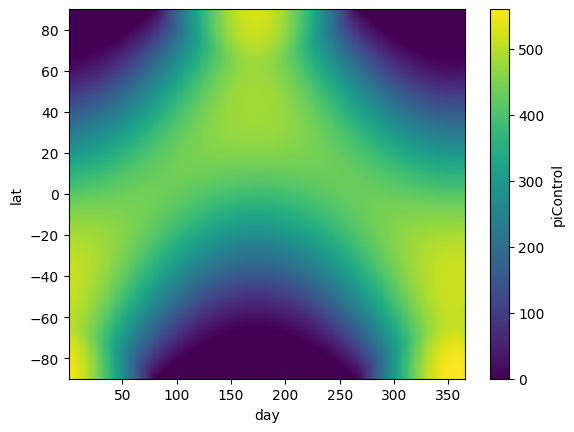

In [42]:
pi1.plot()

In [47]:
#Do it from Jan 1 not Mar 21
lig = lig1
pi = pi1
monname=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monlocation=[15,45,74,105,135,166,196,227,258,288,319,349]

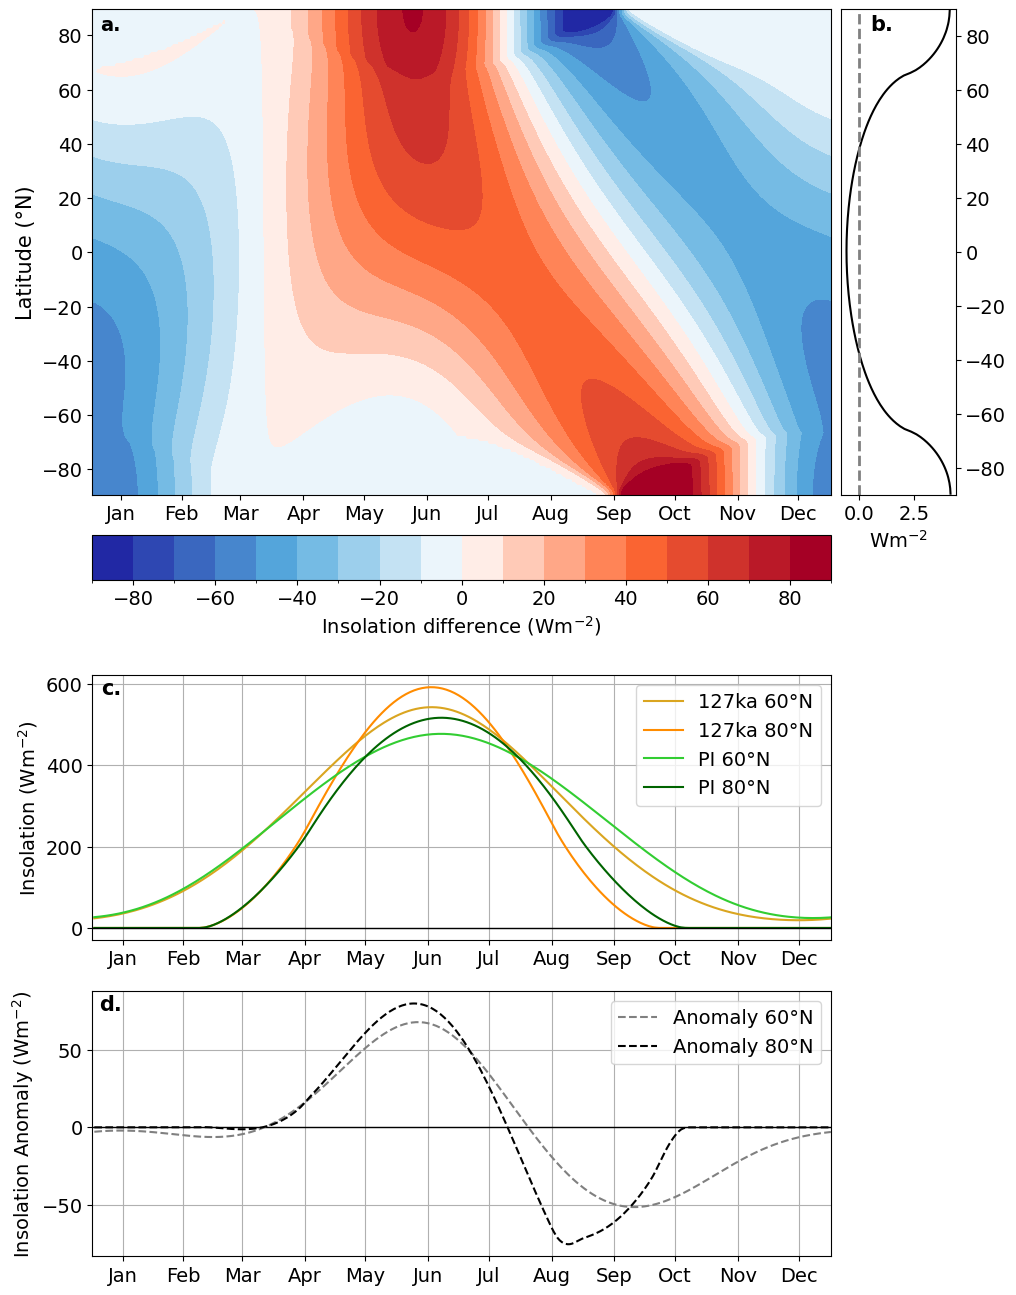

In [50]:
#Do it with GridSpec to finetune the control
fig = plt.figure(figsize=(20, 33))
fontsize = 15
color_list = [
    '#2128A4',  # deeper, more saturated blue
    '#57ADDE',  # more saturated cyan
    '#FFFFFF',  # white
    '#FF6A33',  # slightly more red-orange
    '#A50025',  # richer red
]
cmap = LinearSegmentedColormap.from_list('BlueYellowRed', color_list, N=256)
bounds = [-200, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 200]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

# Use 29 rows: 12 for ax1, 1 for spacing, 1 for colorbar, 1 for spacing, 6 for ax3, 1 for spacing, 6 for ax4, 1 for spacing
gs = gridspec.GridSpec(29, 25, height_ratios=[11, 0.25, 1, 1.5, 6, 0.5, 6, 1] + [1] * 21)

# Main anomaly plot
ax1 = fig.add_subplot(gs[0, 0:12])
fig1 = ax1.contourf(day, lat, lig-pi, levels=bounds, cmap=cmap, norm=norm)
ax1.set_xticks(monlocation)
ax1.set_xticklabels(monname, fontsize=fontsize-1)
ax1.tick_params(axis='y', labelsize=fontsize-1)
ax1.set_title('a.', fontsize=fontsize-1, y=0.94, x=0.025, fontweight='bold')
ax1.set_ylabel('Latitude (%sN)' % chr(176), fontsize=fontsize)

# Colorbar below ax1 with spacing
cax = fig.add_subplot(gs[2, 0:12])  # Row 2 is for the colorbar
cb = fig.colorbar(fig1, cax=cax, orientation="horizontal")
cb.ax.tick_params(labelsize=fontsize-1)
cblabel = 'Insolation difference (Wm$^{-2}$)'
cb.set_label(cblabel, fontsize=fontsize-1)
ticks = [-80, -60, -40, -20, 0, 20, 40, 60, 80]
cb.set_ticks(ticks)

# Latitude-mean anomaly, same height as ax1
ax2 = fig.add_subplot(gs[0, 12:14])
fig2 = ax2.plot(np.average(lig-pi, axis=1), lat, 'black')
ax2.axvline(x=0, color='gray', linestyle="--", linewidth=2)
ax2.set_xlabel('Wm$^{-2}$', fontsize=fontsize-1)
ax2.set_title('b.', fontsize=fontsize, y=0.94, x=0.35, fontweight='bold')
ax2.tick_params(axis='x', labelsize=fontsize-1)
ax2.set_ylim([-90, 90])
ax2.tick_params(axis='y', labelsize=fontsize-1)
ax2.yaxis.tick_right()

# Timeseries at 60N/80N (same height as before)
ax3 = fig.add_subplot(gs[4, 0:12])  # Row 4 for ax3
ax3.plot(day, np.average(lig[149:151], axis=0), color='goldenrod', ls='solid', label='127ka 60%sN' % (chr(176)))
ax3.plot(day, np.average(lig[169:171], axis=0), color='darkorange', ls='solid', label='127ka 80%sN' % (chr(176)))
ax3.plot(day, np.average(pi[149:151], axis=0), color='limegreen', ls='solid', label='PI 60%sN' % (chr(176)))
ax3.plot(day, np.average(pi[169:171], axis=0), color='darkgreen', ls='solid', label='PI 80%sN' % (chr(176)))
ax3.set_xticks(monlocation)
ax3.set_xlim([0, 365])
ax3.set_xticklabels(monname, fontsize=fontsize-1)
ax3.set_title('c.', fontsize=fontsize, y=0.895, x=0.025, fontweight='bold')
ax3.set_ylabel('Insolation (Wm$^{-2}$)', fontsize=fontsize-1)
ax3.tick_params(axis='y', labelsize=fontsize-1)
ax3.legend(loc='upper right', fontsize=fontsize-1)
ax3.grid(True, which='both', linestyle='-', alpha=1.0)
ax3.axhline(y=0, color='black', linestyle="-", linewidth=1)

# Anomaly timeseries (same height as before)
ax4 = fig.add_subplot(gs[6, 0:12])  # Row 6 for ax4
diff = np.array(lig-pi)
ax4.axhline(y=0, color='black', linestyle="-", linewidth=1)
ax4.plot(day, np.average(diff[149:151], axis=0), 'gray', ls='dashed', label='Anomaly 60%sN' % (chr(176)))
ax4.plot(day, np.average(diff[169:171], axis=0), 'black', ls='dashed', label='Anomaly 80%sN' % (chr(176)))
ax4.set_ylabel('Insolation Anomaly (Wm$^{-2}$)', fontsize=fontsize-1)
ax4.set_xticks(monlocation)
ax4.set_xlim([0, 365])
ax4.set_xticklabels(monname, fontsize=fontsize-1)
ax4.set_title('d.', fontsize=fontsize, y=0.895, x=0.025, fontweight='bold')
ax4.set_ylabel('Insolation Anomaly (Wm$^{-2}$)', fontsize=fontsize-1)
ax4.tick_params(axis='y', labelsize=fontsize-1)
ax4.legend(loc='upper right', fontsize=fontsize-1)
ax4.grid(True, which='both', linestyle='-', alpha=1.0)

plt.savefig('lig_insolation_Matt.png', bbox_inches='tight', pad_inches=0.25)
plt.savefig('lig_insolation.pdf')